# University ranks

## Introduction

The goal of this work is to answer the following questions:

* How  do  university  rankings  change  over  time?
* Which  characteristics  of  universities  contribute most to good rankings, or to large changes in the ranking position?
* How do these characteristics correlate with characteristics of cities or countries in which the university islocated?
* Are there predictors for increases or decreases in the rankings?

In the course of this work, these questions will be refined and precised before being answered.

The work is devided in three parts, which correspond to the steps in the data science process. First, we will load all necessary data. This includes also data cleaning. Then the data will be explored using plots and calculating descriptive statistics. The third step will be to model the data using ML models.

Before starting, we need to load the needed packages for data processing and visualisation:

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 15

import glob
import matplotlib.pyplot as plt

## Step 1: Load the data

We load the CWUR data and the Shanghai data. They are available at https://www.kaggle.com/mylesoneill/world-university-rankings. For the Shanghai data the respective countries of the universities have to be merged.

In [2]:
# read the data
datapath = "data/university_data/"

cwur = pd.read_csv(datapath + "/cwurData.csv", header=0)
cwur.set_index(["year", "institution"], inplace=True)
display(cwur)

world_rank         country  \
year institution                                                         
2012 Harvard University                              1             USA   
     Massachusetts Institute of Technology           2             USA   
     Stanford University                             3             USA   
     University of Cambridge                         4  United Kingdom   
     California Institute of Technology              5             USA   
     Princeton University                            6             USA   
     University of Oxford                            7  United Kingdom   
...                                                ...             ...   
2015 Ryerson University                            994          Canada   
     King Abdulaziz University                     995    Saudi Arabia   
     University of the Algarve                     996        Portugal   
     Alexandria University                         997           Egypt   
     Federal University of Ceará                   998          Brazil   
     University of A Coruña                        999           Spain   
     China Pharmaceutical University              1000           China   

                                            national_rank  \
year institution                                            
2012 Harvard University                                 1   
     Massachusetts Institute of Technology              2   
     Stanford University                                3   
     University of Cambridge                            1   
     California Institute of Technology                 4   
     Princeton University                               5   
     University of Oxford                               2   
...                                                   ...   
2015 Ryerson University                                33   
     King Abdulaziz University                          4   
     University of the Algarve                          7   
     Alexandria University                              4   
     Federal University of Ceará                       18   
     University of A Coruña                            40   
     China Pharmaceutical University                   83   

                                            quality_of_education  \
year institution                                                   
2012 Harvard University                                        7   
     Massachusetts Institute of Technology                     9   
     Stanford University                                      17   
     University of Cambridge                                  10   
     California Institute of Technology                        2   
     Princeton University                                      8   
     University of Oxford                                     13   
...                                                          ...   
2015 Ryerson University                                      367   
     King Abdulaziz University                               367   
     University of the Algarve                               367   
     Alexandria University                                   236   
     Federal University of Ceará                             367   
     University of A Coruña                                  367   
     China Pharmaceutical University                         367   

                                            alumni_employment  \
year institution                                                
2012 Harvard University                                     9   
     Massachusetts Institute of Technology                 17   
     Stanford University                                   11   
     University of Cambridge                               24   
     California Institute of Technology                    29   
     Princeton University                                  14   
     University of Oxford                                  28   
...  

In [3]:
shanghai = pd.read_csv(datapath + "/shanghaiData.csv", header=0)
uni2country = pd.read_csv(datapath + "/school_and_country_table.csv", header=0)
shanghai = shanghai.merge(uni2country, left_on = "university_name", right_on = "school_name")
del shanghai['school_name']
shanghai.set_index("year",inplace=True)
display(shanghai)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,country
year,,,,,,,,,,,
2005,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,United States of America
2006,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.6,United States of America
2007,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.0,United States of America
2008,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.1,United States of America
2009,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.8,United States of America
2010,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,69.2,United States of America
2011,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,70.5,United States of America
...,...,...,...,...,...,...,...,...,...,...,...
2015,201-300,KTH Royal Institute of Technology,6-7,NaN,0.0,14.9,3.6,10.3,38.3,24.2,Sweden


In [4]:
pass

# do we need this?
"""
educ_attainment = pd.read_csv(datapath + "/educational_attainment_supplementary_data.csv", header=0)
timesData = pd.read_csv(datapath + "/timesData.csv", header=0)

display(educ_attainment)
display(timesData)
"""

'\neduc_attainment = pd.read_csv(datapath + "/educational_attainment_supplementary_data.csv", header=0)\ntimesData = pd.read_csv(datapath + "/timesData.csv", header=0)\n\ndisplay(educ_attainment)\ndisplay(timesData)\n'

One goal is to investigate whether and how expenditure for education affects university ranks. For this we need to load the relevant data (which is also available via the above kaggle repository).

This dataset has to be extensively reformatted before working with it, as we need the different years as values in a year column and the different kinds of expenditures should show up in different rows. This is done by the code below. The file was first cleaned manually by deleting the initial spaces of several rows. Furthermore some country names have to be replaced in order to be able to match the country names with the Shanghai ranking

In [5]:
# read the data
educ_expenditure = pd.read_csv(datapath + "/education_expenditure_supplementary_data.csv",
                               header=0,
                               quotechar="\"")

# replace the country names by the above names
country_dict = {"Korea, Republic of" : "South Korea",
                "Russian Federation" : "Russia",
                "United States" : "United States of America",
                "Slovak Republic" : "Slovakia"}
for key, value in country_dict.items():
    educ_expenditure.replace(key, value, inplace=True)

# clean the columns by stripping the string
educ_expenditure["institute_type"]=educ_expenditure["institute_type"].str.strip()


# reformat the dataframe
# first we make a row for each year value and add a year column
years = [1995,2000,2005,2009,2010,2011]

concat_list = []
for year in years:
    cols = ["country","institute_type","direct_expenditure_type", str(year)]
    concat_df = educ_expenditure.copy()[cols]
    concat_df["year"]=year
    concat_df.rename(columns = {str(year) : "percentage of GDP"}, inplace=True)
    concat_list.append(concat_df)

educ_expenditure_processed = pd.concat(concat_list, axis=0, ignore_index=True, sort=False)


# now we transform the values of "institute type" and "direct_expenditure_type" into columns
# so that we obtain a column for each value of "institute_type" and "direct_expenditure_type"
institute_types = set(educ_expenditure_processed["institute_type"])
direct_expenditure_types = set(educ_expenditure_processed["direct_expenditure_type"])

merge_list = []
for institute_type in institute_types:
    for direct_expenditure_type in direct_expenditure_types:
        # extract the data with the corresponding "institute_type" and "direct_expenditure_type"
        
        merge_df =educ_expenditure_processed[(educ_expenditure_processed["institute_type"]==institute_type) & 
                                   (educ_expenditure_processed["direct_expenditure_type"]==direct_expenditure_type)].copy()
        merge_df = merge_df[["country", "year", "percentage of GDP"]]
        merge_df.rename(columns = {"percentage of GDP": "percentage of GDP," + institute_type + "," + direct_expenditure_type},
                       inplace=True)
        merge_list.append(merge_df)
        # and store the data separatly

# the data for every single "institute_type" and "direct_expenditure_type" is merged
for merge_df in merge_list[1:]:
    merge_list[0]=merge_list[0].merge(merge_df, on = ["country", "year"])

# take the merged data and set index and multicolumn
educ_expenditure_processed = merge_list[0]
educ_expenditure_processed.set_index(["year", "country"], inplace=True)
educ_expenditure_processed.columns = pd.MultiIndex.from_tuples(
    [(c.split(",")[0], c.split(",")[1], c.split(",")[2]) for c in educ_expenditure_processed.columns]
     )
educ_expenditure_processed

percentage of GDP                 \
                              Higher Education Institutions                  
                                                      Total Private Public   
year country                                                                 
1995 OECD Average                                       NaN     NaN    0.9   
     Australia                                          NaN     NaN    1.2   
     Austria                                            NaN     NaN    0.9   
     Belgium                                            NaN     NaN    0.9   
     Canada                                             NaN     NaN    1.5   
     Chile                                              NaN     NaN    NaN   
     Czech Republic                                     NaN     NaN    0.7   
...                                                     ...     ...    ...   
2011 Sweden                                             1.7     0.2    1.6   
     Switzerland                                        NaN     NaN    1.3   
     Turkey                                             NaN     NaN    NaN   
     United Kingdom                                     1.2     0.3    0.9   
     United States of America                           2.7     1.8    0.9   
     Brazil                                             NaN     NaN    0.9   
     Russia                                             1.4     0.5    0.9   

                                                               \
                              All Institutions                  
                                         Total Private Public   
year country                                                    
1995 OECD Average                          NaN     NaN    4.9   
     Australia                             NaN     NaN    4.5   
     Austria                               NaN     NaN    5.3   
     Belgium                               NaN     NaN    5.0   
     Canada                                NaN     NaN    5.8   
     Chile                                 NaN     NaN    NaN   
     Czech Republic                        NaN     NaN    4.8   
...                                        ...     ...    ...   
2011 Sweden                                6.3     0.2    6.2   
     Switzerland                           5.6     0.4    5.2   
     Turkey                                NaN     NaN    NaN   
     United Kingdom                        6.4     0.8    5.6   
     United States of America              6.9     2.2    4.7   
     Brazil                                NaN     NaN    5.9   
     Russia                                4.6     0.7    3.9   

                                                                             \
                              Elementary and Secondary Institutions           
                                                              Total Private   
year country                                                                  
1995 OECD Average                                               NaN     NaN   
     Australia                                                  NaN     NaN   
     Austria                                                    NaN     NaN   
     Belgium                                                    NaN     NaN   
     Canada                                                     NaN     NaN   
     Chile                                                      NaN     NaN   
     Czech Republic                                             NaN     NaN   
...                                                             ...     ...   
2011 Sweden                                                     3.9     0.0   
     Switzerland                                                4.0     0.5   
     Turkey                                                     NaN     NaN   
     United Kingdom                                             4.7     0.4   
     United States of America                              

Now the expenditure data is merged to the Shanghai data. As the Shanghai data contains precise ranks only for ranks below 100, we add a column "world_rank_rand_between" containing a random rank between the minimal and the maximal rank. This is mainly done in order to plot the data in a reasonable way.

In [6]:
# merge expenditure to shanghai data
uni_exp=educ_expenditure_processed.merge(shanghai, on = ["year", "country"]).copy()

# extract minimal and maximal rank (those are equal when the rank is below 100)
uni_exp["world_rank_min"] = uni_exp["world_rank"].str.split("-").str[0].astype(int)
uni_exp["world_rank_max"] = uni_exp["world_rank"].str.split("-").str[-1].astype(int)

# take a random rank between min and max rank
uni_exp['world_rank_rand_between'] = uni_exp.apply(lambda x: np.random.randint(x.world_rank_min, x.world_rank_max + 1), axis=1)

display(uni_exp)

/home/julian/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,country,"(percentage of GDP, Higher Education Institutions, Total)","(percentage of GDP, Higher Education Institutions, Private)","(percentage of GDP, Higher Education Institutions, Public)","(percentage of GDP, All Institutions, Total)","(percentage of GDP, All Institutions, Private)","(percentage of GDP, All Institutions, Public)","(percentage of GDP, Elementary and Secondary Institutions, Total)","(percentage of GDP, Elementary and Secondary Institutions, Private)","(percentage of GDP, Elementary and Secondary Institutions, Public)",...,total_score,alumni,award,hici,ns,pub,pcp,world_rank_min,world_rank_max,world_rank_rand_between
year,,,,,,,,,,,,,,,,,,,,,
2005,Australia,NaN,NaN,0.8,NaN,NaN,4.3,NaN,NaN,3.4,...,26.0,15.4,14.4,22.2,18.7,53.5,19.9,82,82,82
2005,Australia,NaN,NaN,0.8,NaN,NaN,4.3,NaN,NaN,3.4,...,NaN,16.6,0.0,7.9,19.9,50.1,18.9,101,152,152
2005,Australia,NaN,NaN,0.8,NaN,NaN,4.3,NaN,NaN,3.4,...,NaN,19.8,0.0,19.2,17.8,54.5,19.7,101,152,123
2005,Australia,NaN,NaN,0.8,NaN,NaN,4.3,NaN,NaN,3.4,...,NaN,0.0,0.0,19.2,14.3,47.0,17.6,153,202,165
2005,Australia,NaN,NaN,0.8,NaN,NaN,4.3,NaN,NaN,3.4,...,NaN,0.0,0.0,13.6,15.9,25.6,17.9,203,300,210
2005,Australia,NaN,NaN,0.8,NaN,NaN,4.3,NaN,NaN,3.4,...,NaN,0.0,0.0,7.9,15.4,44.6,14.7,203,300,250
2005,Australia,NaN,NaN,0.8,NaN,NaN,4.3,NaN,NaN,3.4,...,NaN,0.0,0.0,13.6,5.5,27.5,15.4,301,400,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,United States of America,2.7,1.8,0.9,6.9,2.2,4.7,3.7,0.3,3.4,...,NaN,0.0,0.0,12.5,8.2,20.2,16.1,401,500,480


## Step 2: Explore the data

After having read in the data, we can now explore the data.

In the next cell, the behaviour of rankings and scores are analysed in dependance of the national expenditure for education.

RANK
by year


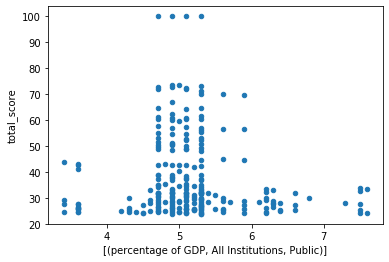

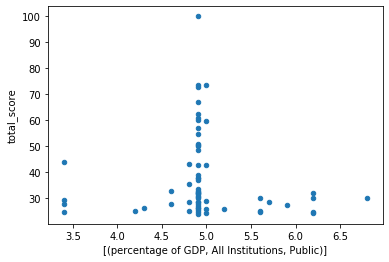

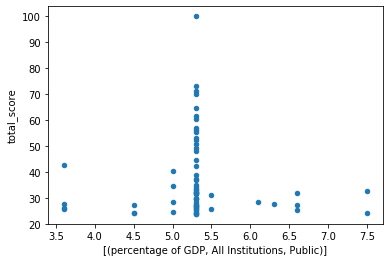

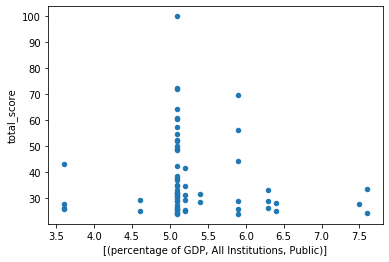

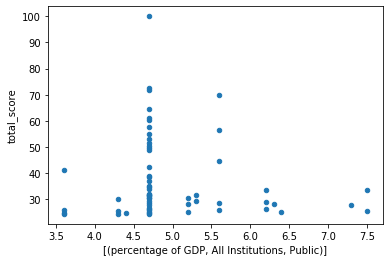

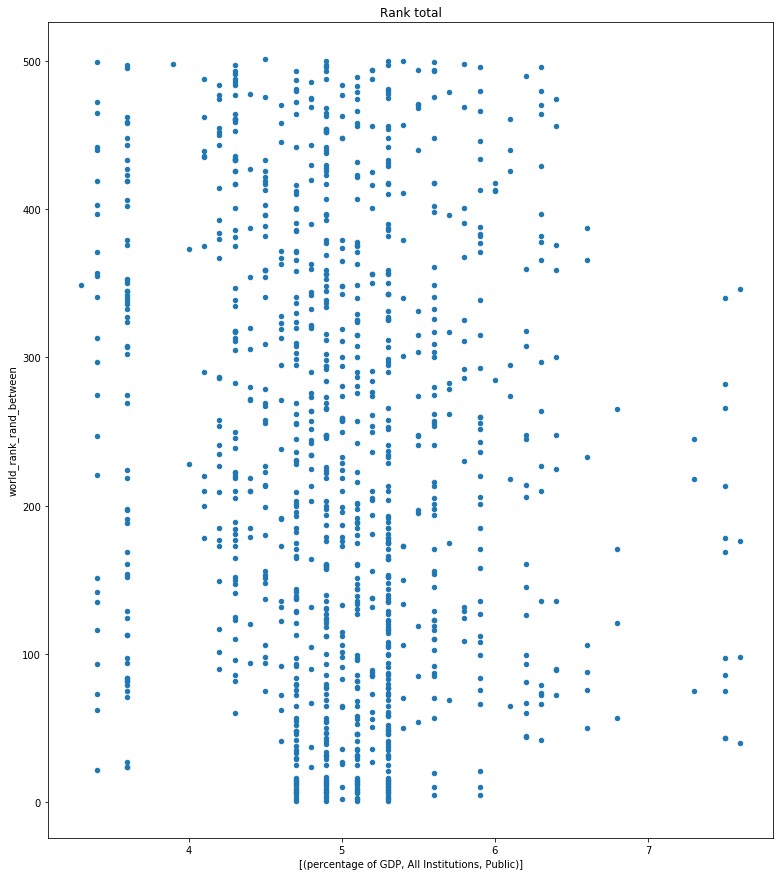

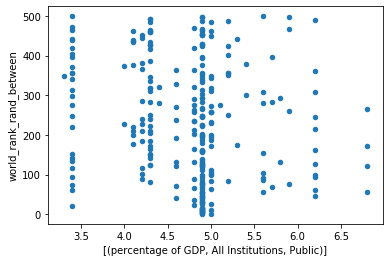

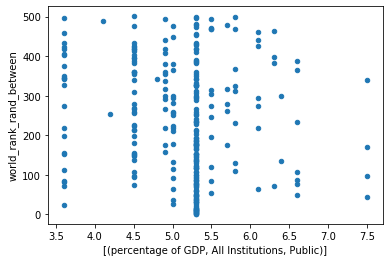

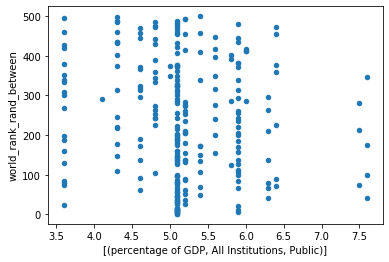

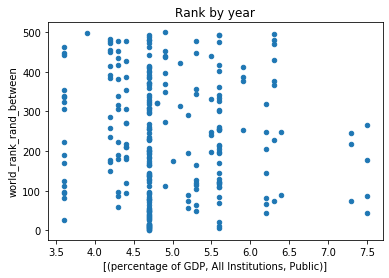

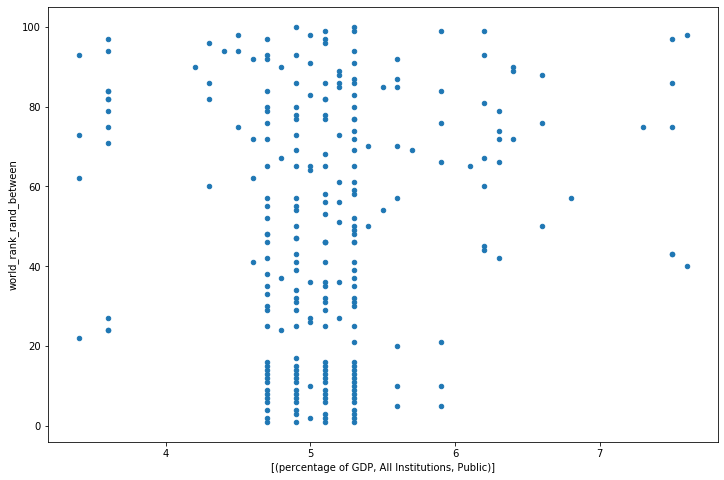

In [9]:
# score vs percentage of gdp
# total data
uni_exp.plot([('percentage of GDP', 'All Institutions', 'Public')], "total_score", kind="scatter")
# by year
uni_exp.groupby("year").plot([('percentage of GDP', 'All Institutions', 'Public')], "total_score", kind="scatter")


print("RANK")
# rank vs percentage of gdp
# total data
uni_exp.plot([('percentage of GDP', 'All Institutions', 'Public')], "world_rank_rand_between", kind="scatter", figsize = (13,15))
plt.title("Rank total")
plt.show
print("by year")
# by year
uni_exp.groupby("year").plot([('percentage of GDP', 'All Institutions', 'Public')], "world_rank_rand_between", kind="scatter")
plt.title("Rank by year")
plt.show

# top 100 data
uni_exp100 = uni_exp[uni_exp["world_rank_rand_between"]<101]
uni_exp100.plot([('percentage of GDP', 'All Institutions', 'Public')], "world_rank_rand_between", kind="scatter", figsize = (12,8))

## Step 3: Model the data